In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [3]:
df=pd.read_csv('Glass Identification.csv', names=columns)
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 1. EDA

In [4]:
df.shape

(214, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df.isnull().sum().to_frame()

,0
Id number,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0


<Axes: >

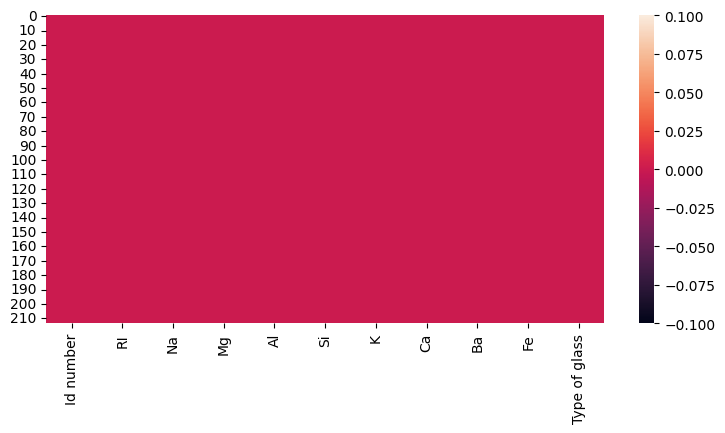

In [7]:
#heatmap
plt.figure(figsize=(9,4))
sns.heatmap(df.isnull())

In [8]:
#Unique values
info_df = df.nunique().to_frame('Unique values')
info_df['type'] = df.dtypes.values
info_df

,Unique values,type
Id number,214,int64
RI,178,float64
Na,142,float64
Mg,94,float64
Al,118,float64
Si,133,float64
K,65,float64
Ca,143,float64
Ba,34,float64
Fe,32,float64


In [9]:
# Dropping Id number
df.drop(['Id number'], axis=1, inplace=True)
df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
13,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
167,1.51969,12.64,0.00,1.65,73.75,0.38,11.53,0.00,0.00,5
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
94,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.00,0.00,2
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
126,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.00,0.00,2
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00,2


In [10]:
#After dropping the column 'ID'
df.sample(4)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.0,0.08,2
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00,2
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.0,0.00,1


In [11]:
df.shape

(214, 10)

In [12]:
# Checking the target unique values
df['Type of glass'].value_counts().to_frame()

,count
Type of glass,
2,76
1,70
7,29
3,17
5,13
6,9


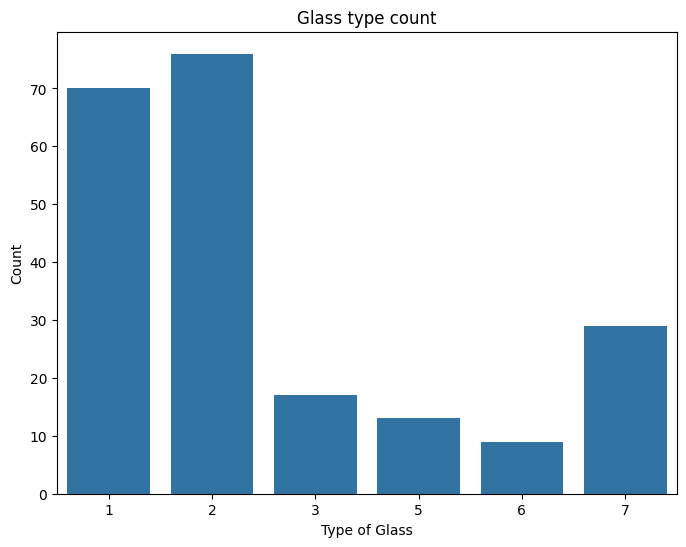

In [13]:
#Viisualising the target variables
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type of glass')
plt.title('Glass type count')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.show()

In [14]:
# Categories:  1: window glass(1-4) and 7: non-window glass(5-7)
type_categories = [1, 7]
conditions =[
    (df['Type of glass'] <= 4 ),
    (df['Type of glass'] > 4)
]
df['Type'] = np.select(conditions, type_categories, default=0 )
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [15]:
df['Type'].value_counts().to_frame()

,count
Type,
1,163
7,51


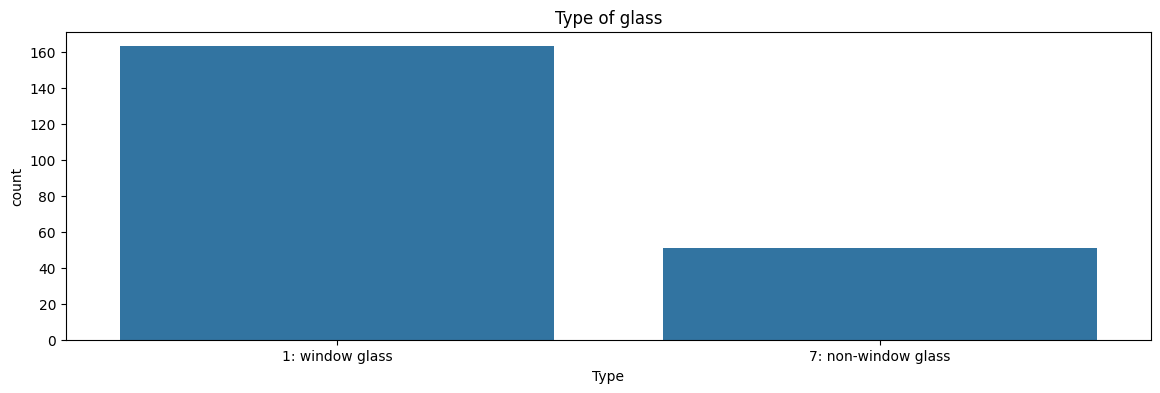

In [16]:
# Visualizing
plt.figure(figsize = (14, 4))
sns.countplot(data=df, x='Type')
plt.xticks((0, 1), ['1: window glass', '7: non-window glass'])
plt.title(f"Type of glass")
plt.show()

In [17]:
# Summary
stats = df.describe()
stats

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374,2.429907
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739,2.562321
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000,7.000000


In [18]:
# Searching for duplicated values
df[df.duplicated()].shape

(1, 11)

In [19]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1,1


In [20]:
# Drop duplicated values
df.drop_duplicates(inplace=True)

# 2. Data Visualisation

In [21]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass',
       'Type'],
      dtype='object')

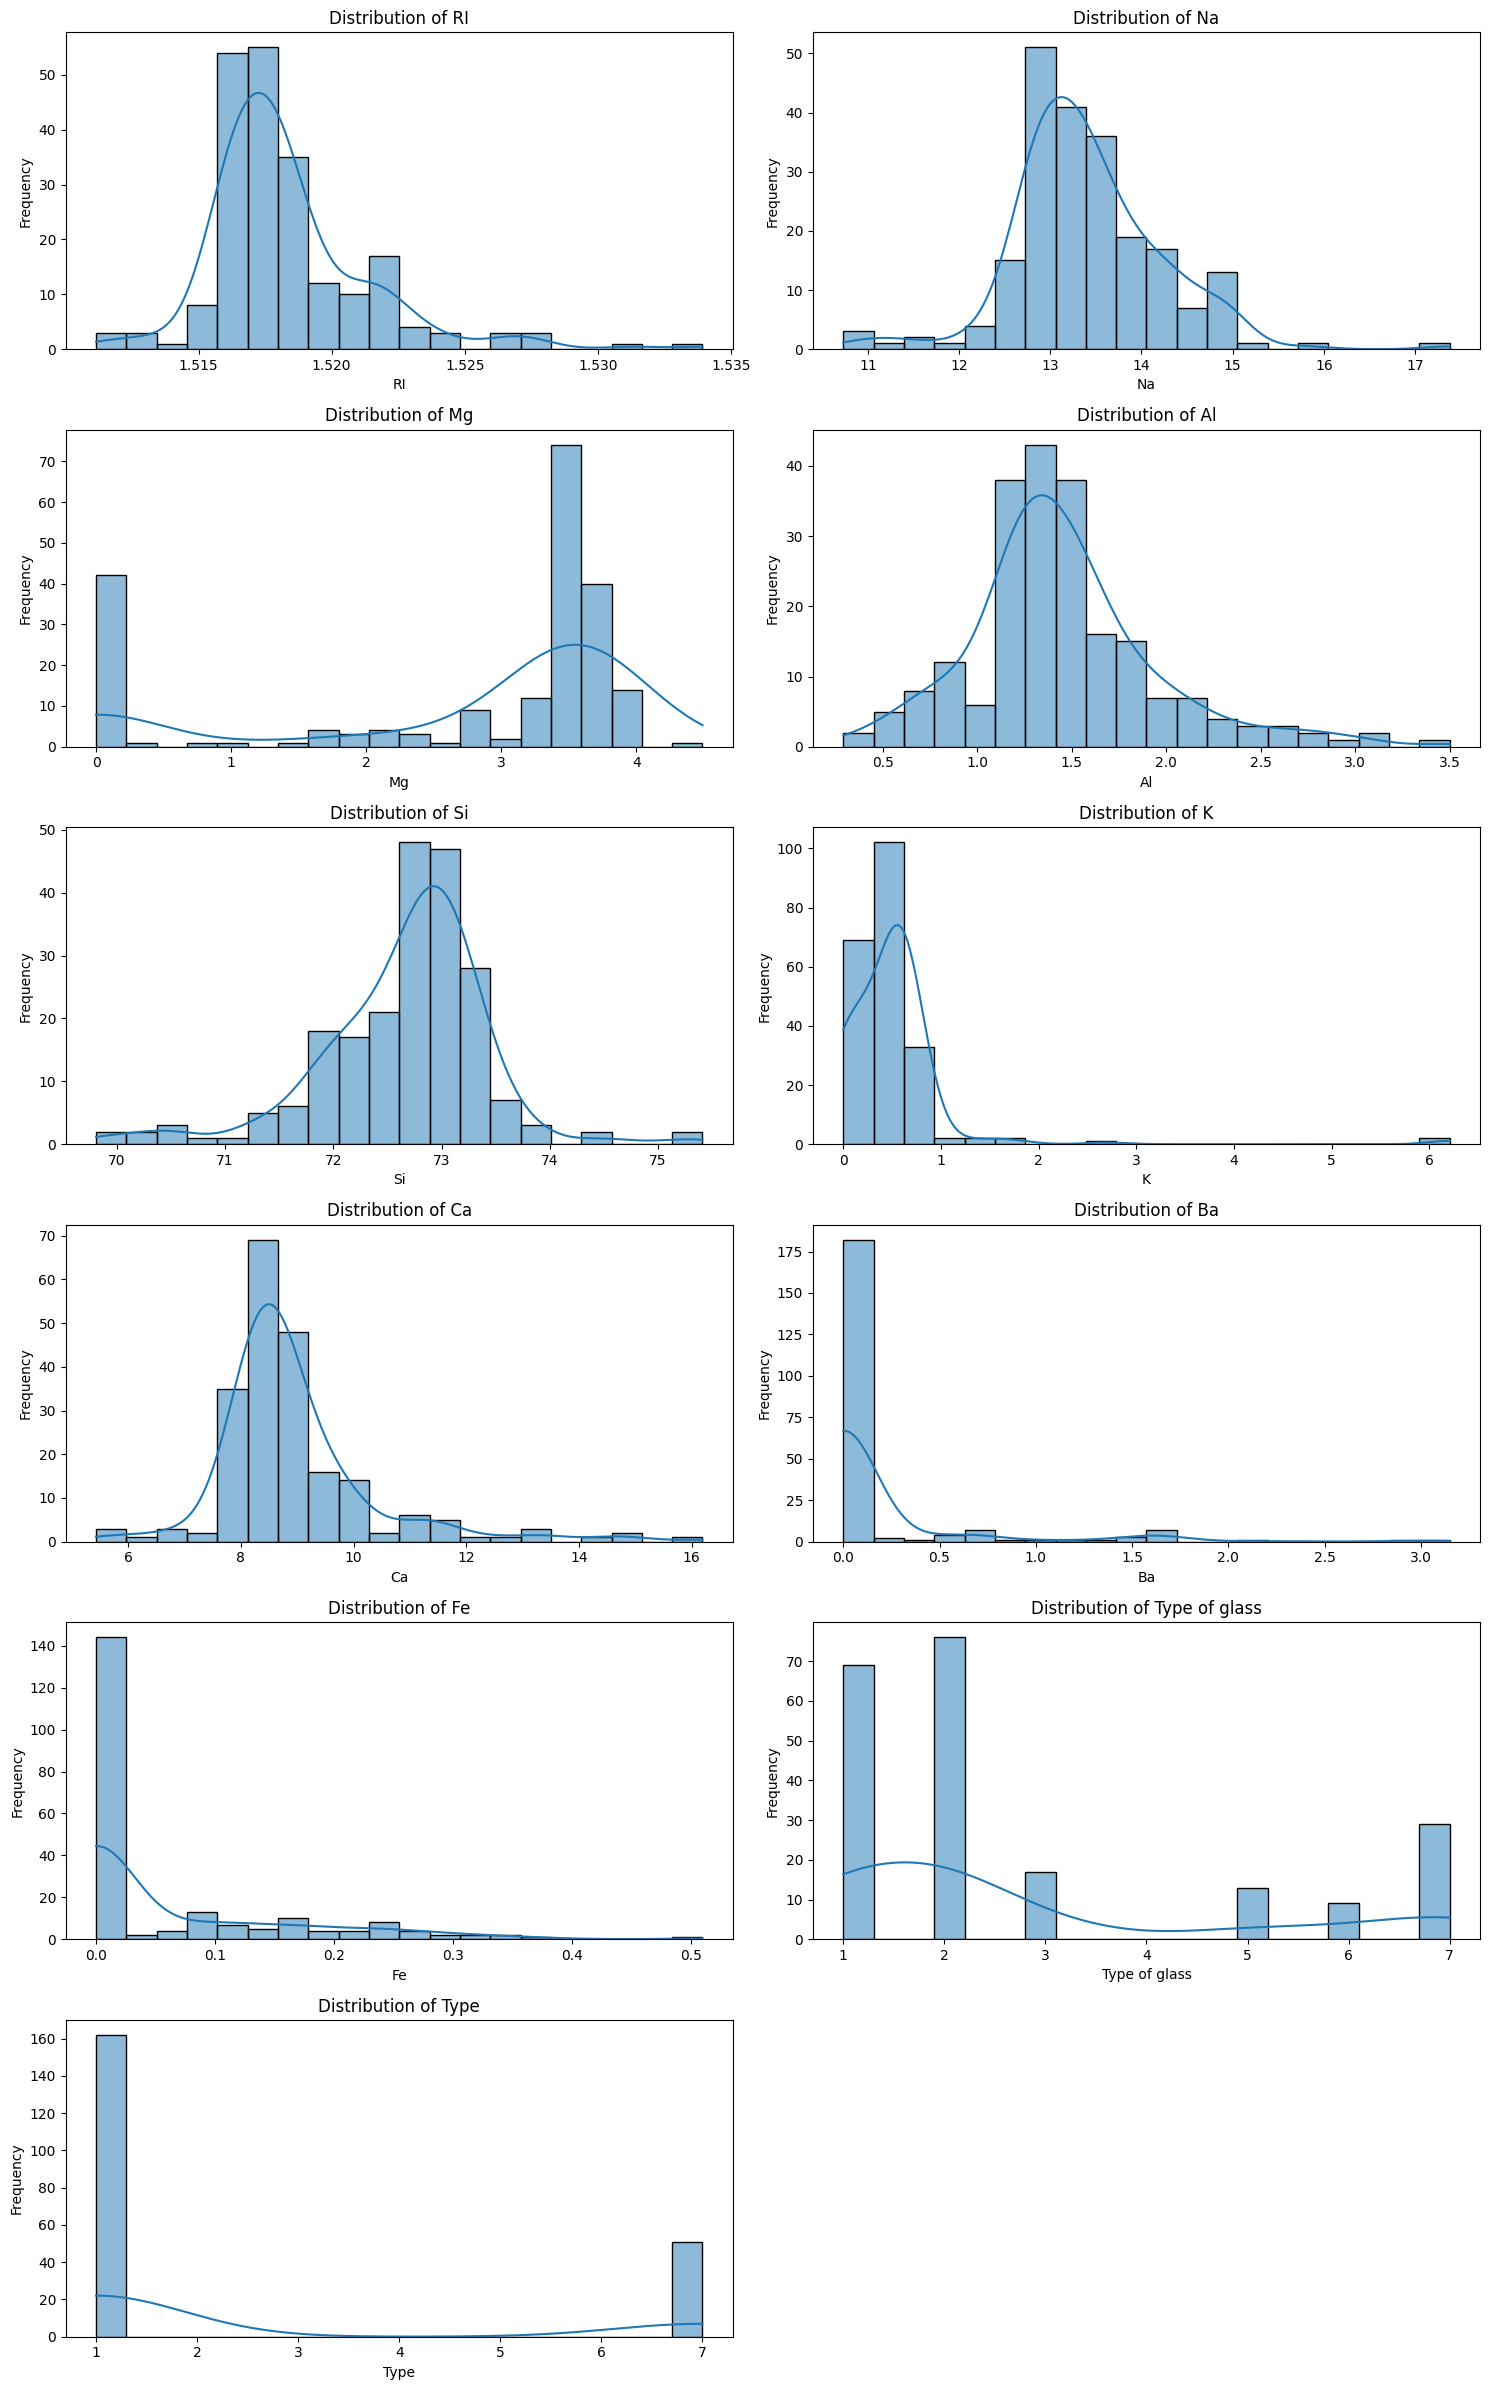

In [22]:
#HISTPLOT
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2  # Two plots per row

# Create a figure with dynamic subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate through columns and plot histograms
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


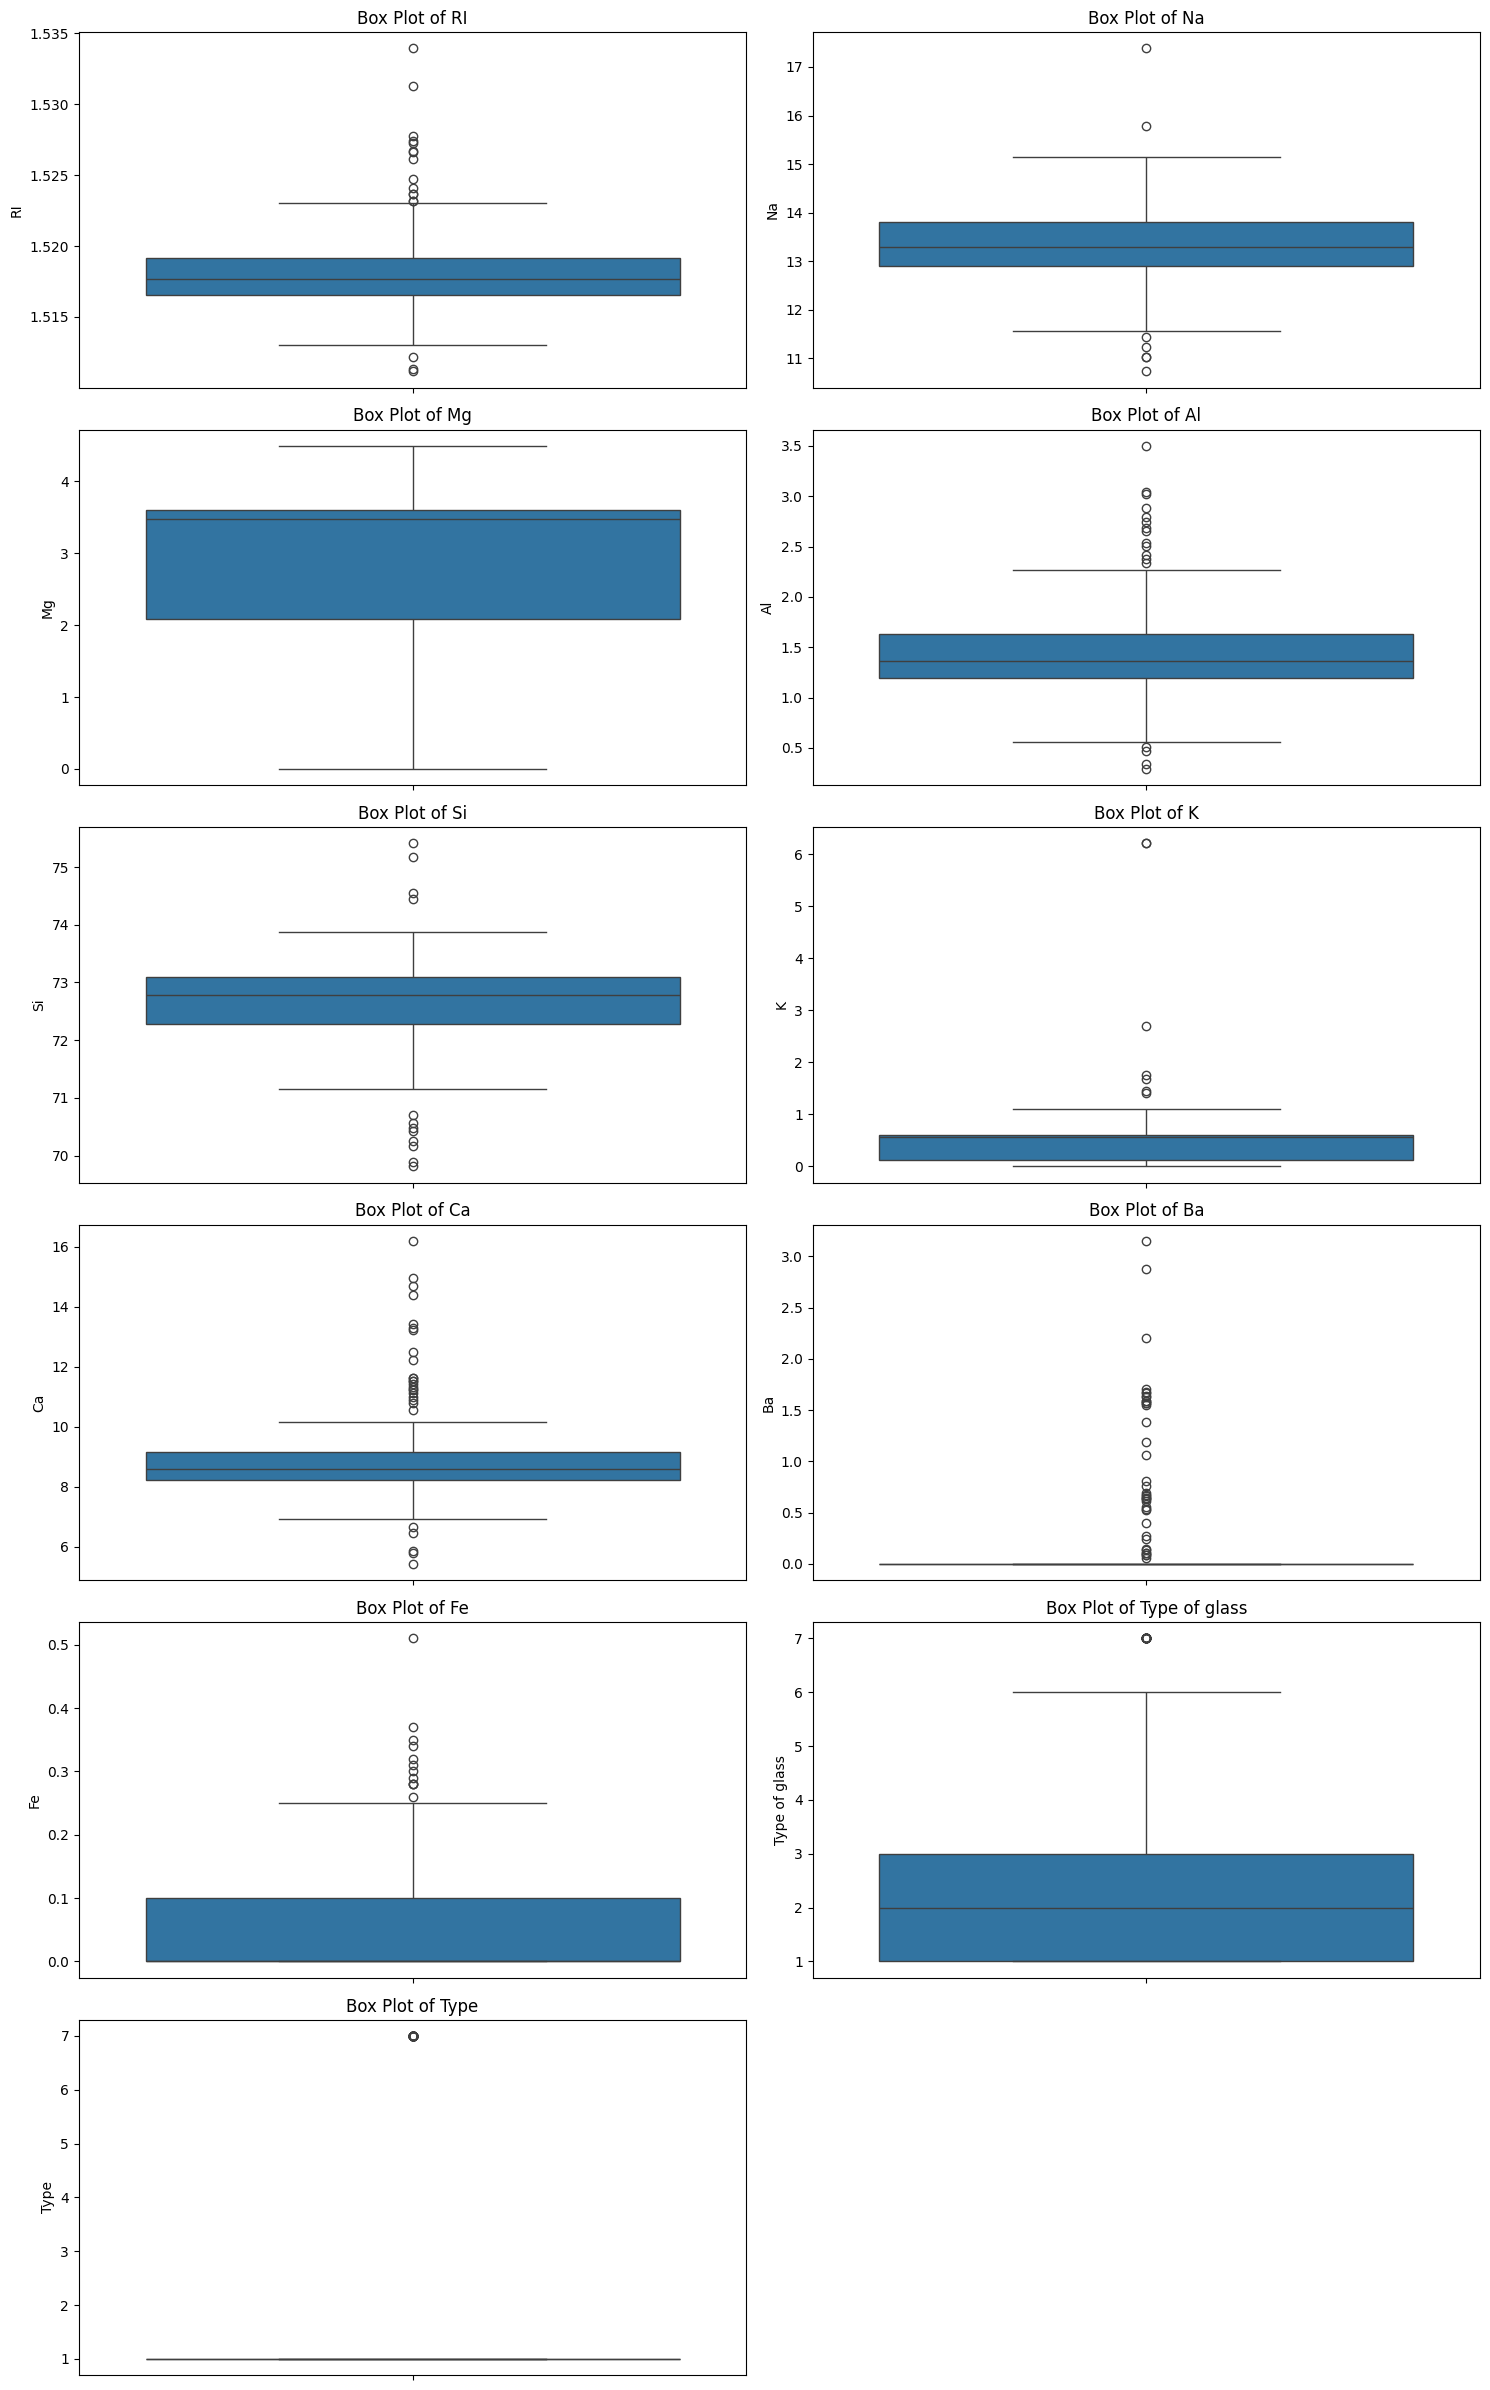

In [23]:
#BOXPLOT
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4))

axes = axes.flatten()

# Iterate through columns and plot boxplots
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

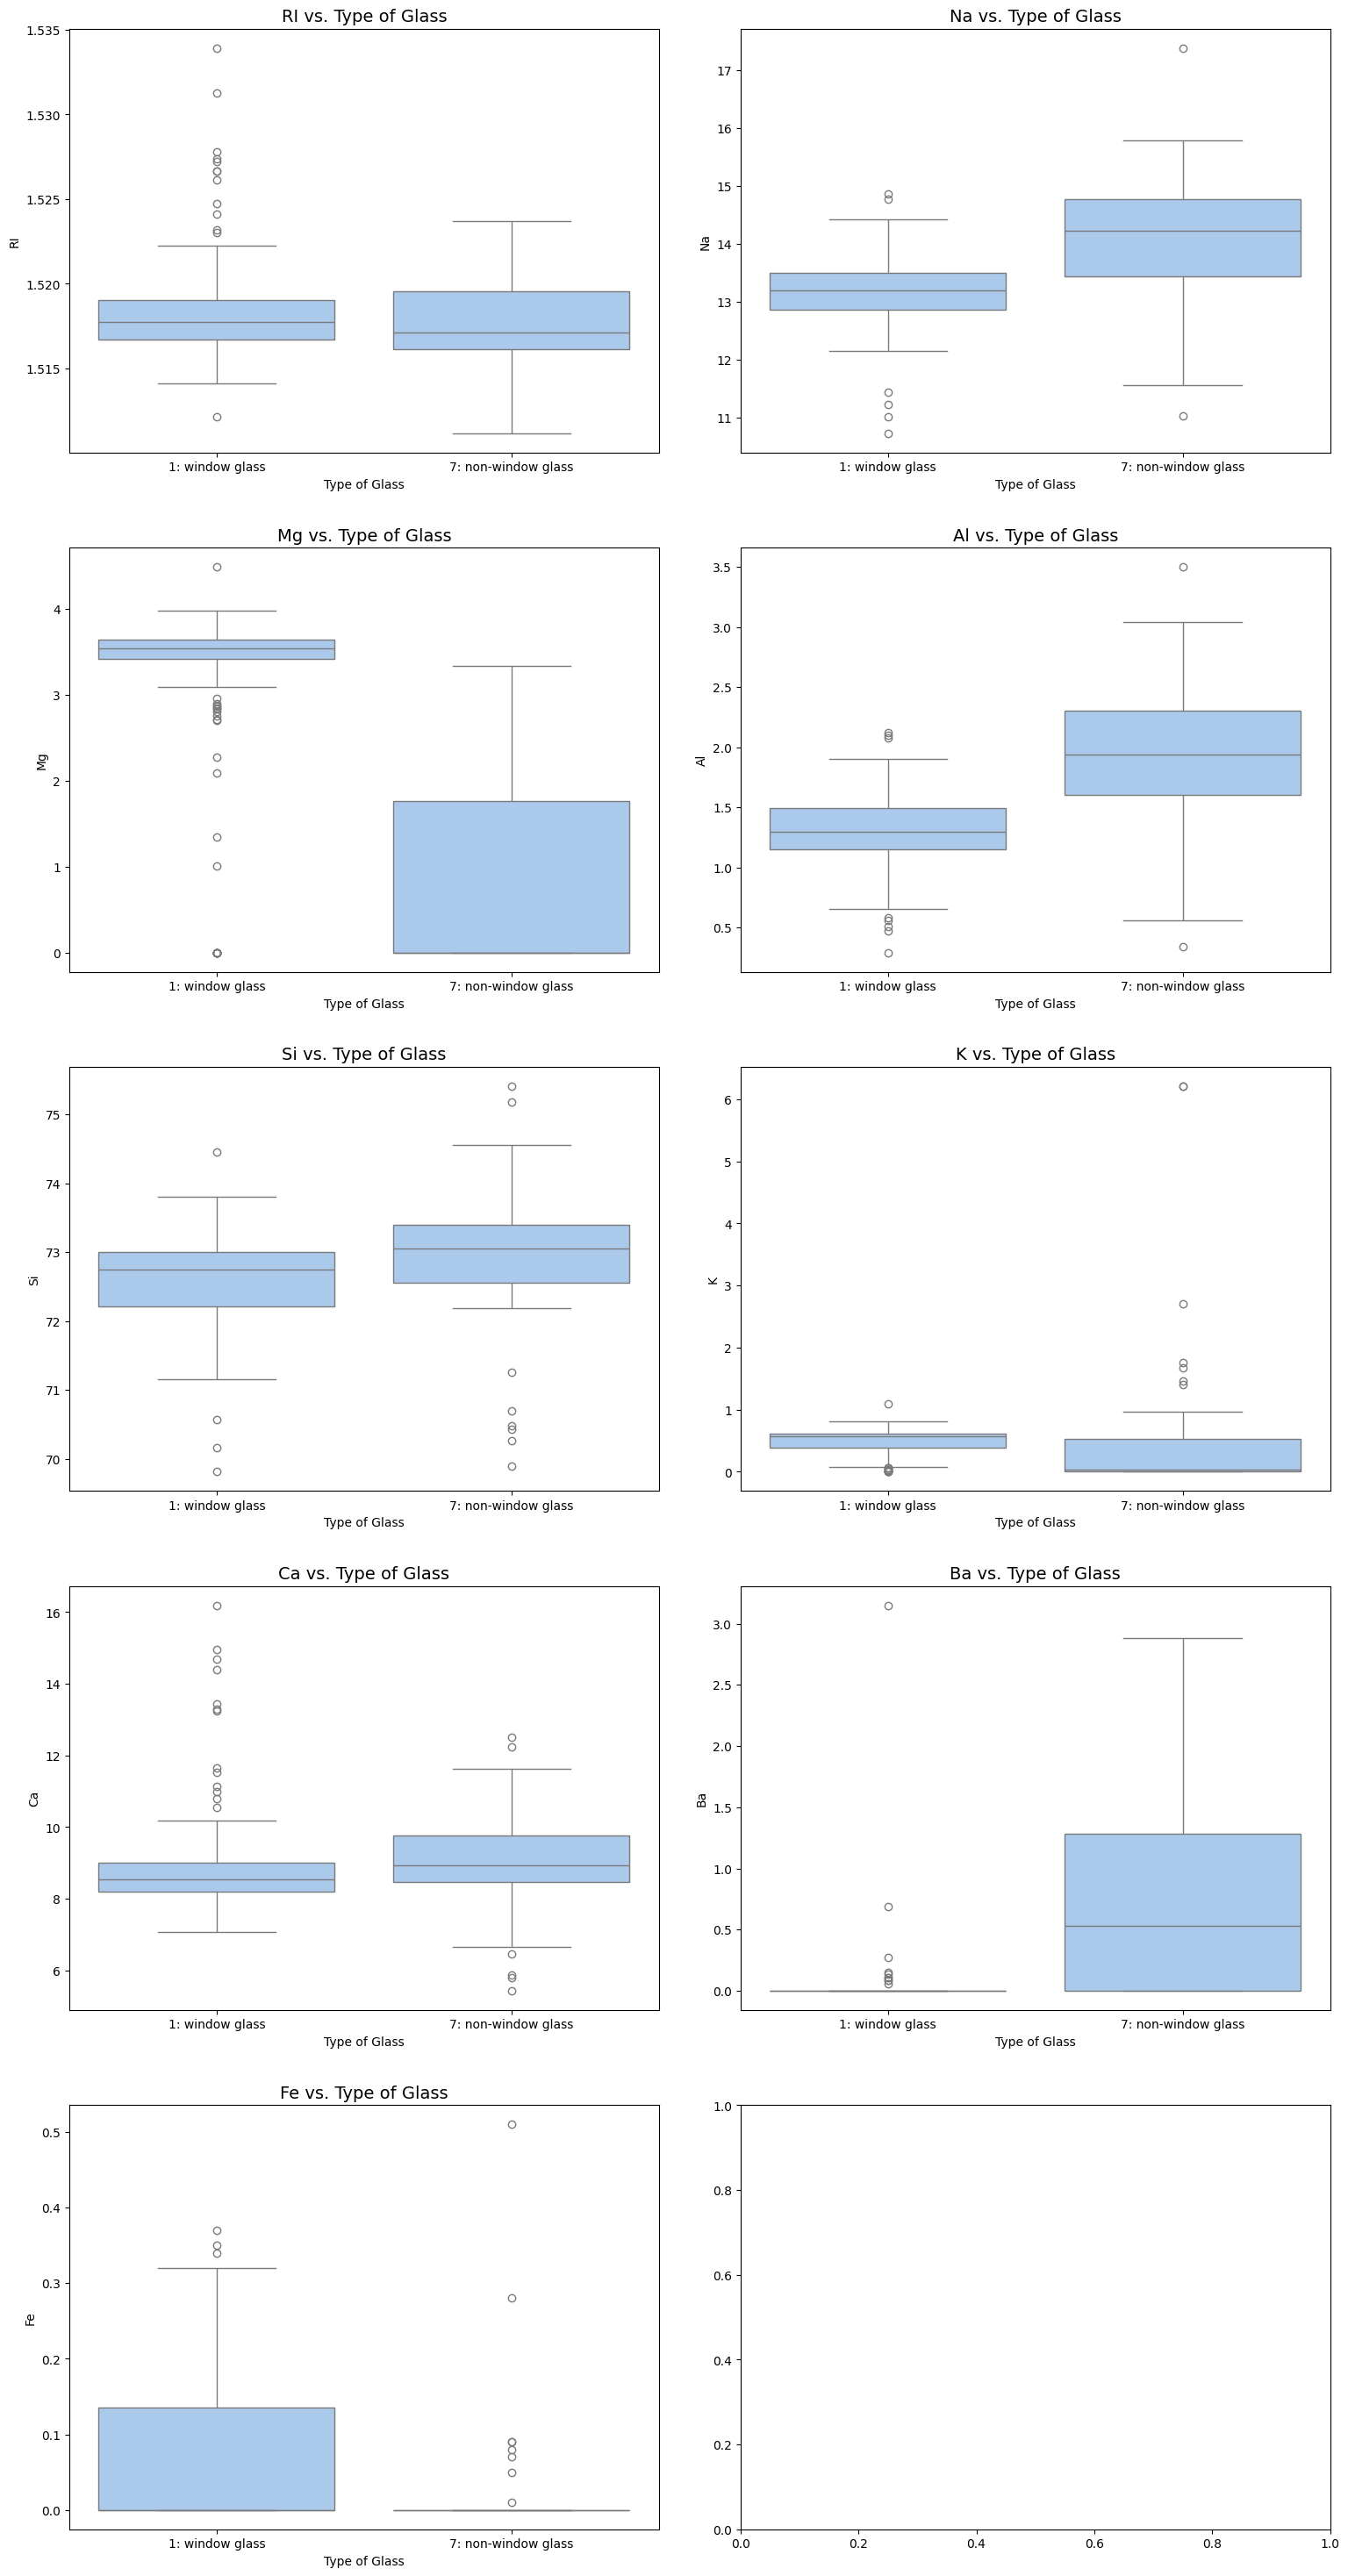

In [24]:
#BIVARIATE ANALYSIS
sns.set_palette('pastel')

# Define labels for the types of glass
type_labels = {1: '1: window glass', 7: '7: non-window glass'}

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 30))

for i, (ax, column) in enumerate(zip(axes.flat, df.columns[:-2])):
    sns.boxplot(data=df, x='Type', y=column, ax=ax)
    ax.set_title(f"{column} vs. Type of Glass", fontsize=14)
    ax.set_xlabel('Type of Glass')
    ax.set_ylabel(column)
    ax.set_xticklabels([type_labels.get(t, t) for t in df['Type'].unique()], fontsize=10)

plt.tight_layout(pad=3.0)
plt.show()

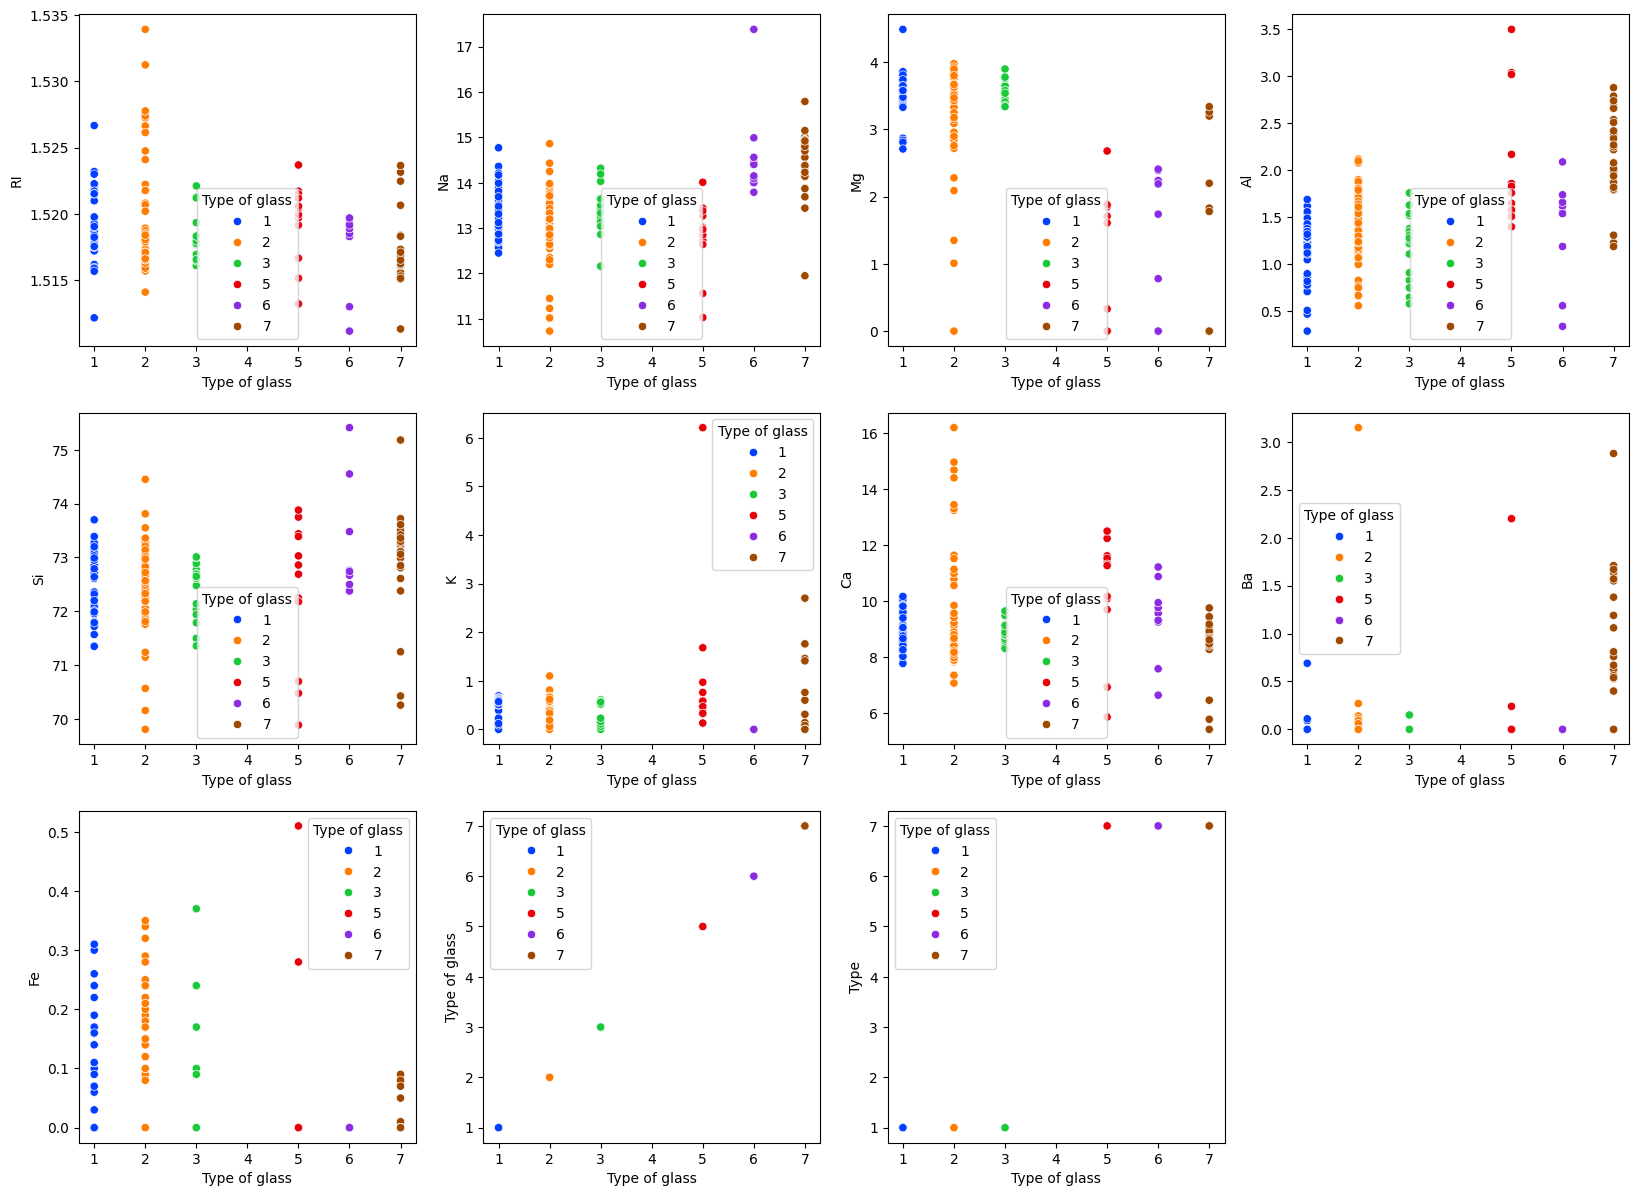

In [25]:
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
  if p<=17:
    plt.subplot(5,4,p)
    sns.scatterplot(x='Type of glass', y=i, data=df, color='r', hue='Type of glass', palette='bright')
    plt.xlabel('Type of glass')
    plt.ylabel(i)
  p+=1
plt.show()

In [26]:
#CORRELATION
# Calculate the correlation between features
cor = df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140,-0.131638
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837,0.456296
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195,-0.757881
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432,0.586513
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725,0.145630
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455,0.052294
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677,0.041853
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896,0.523014
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090,-0.196747
Type of glass,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000,0.941735


In [27]:
# Listing the correlation coeficients with the target variable
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Type') & ~(corr_df['Feature B'].str.contains('Type')) ]

,Feature A,Feature B,Corr coef
18,Type,Al,0.586513
21,Type,Ba,0.523014
28,Type,Na,0.456296
39,Type,Si,0.145630
45,Type,K,0.052294
47,Type,Ca,0.041853
77,Type,RI,-0.131638
85,Type,Fe,-0.196747
119,Type,Mg,-0.757881


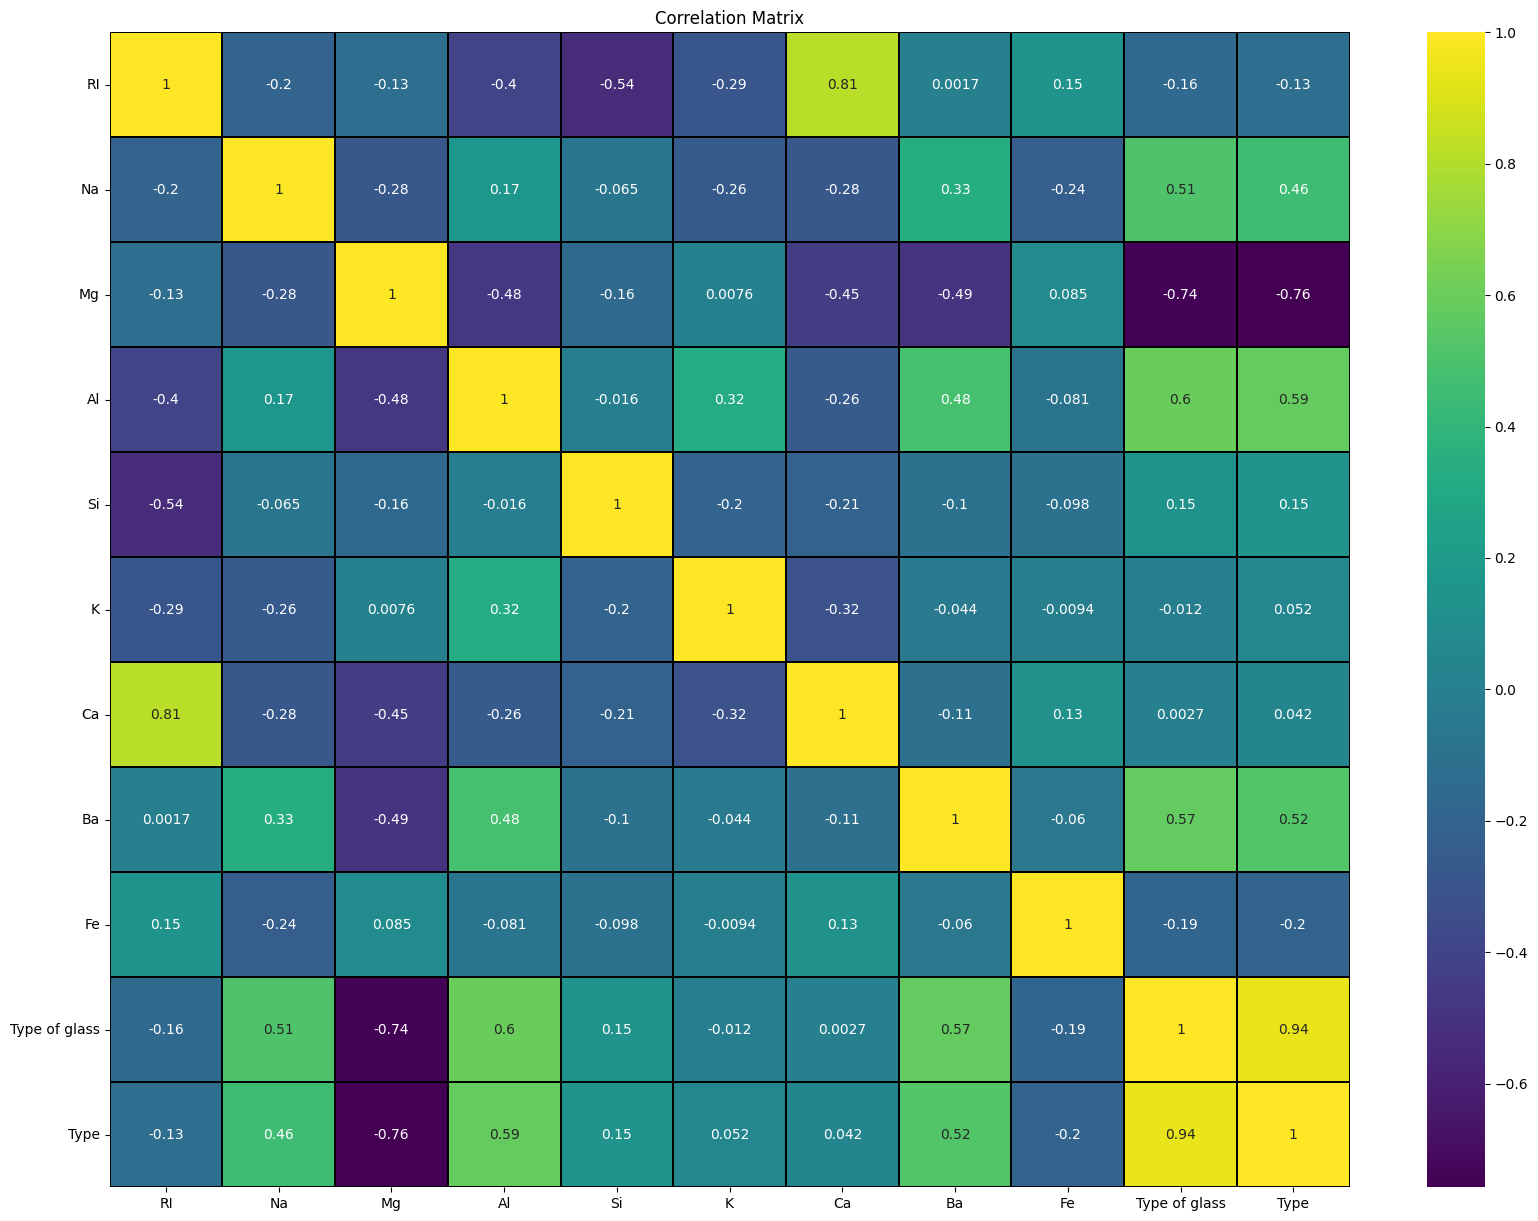

In [28]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2g", linecolor = 'black', cmap='viridis', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [29]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
Type             0
dtype: int64

In [30]:
# drop the column "Type of glass"
df_final = df.drop("Type of glass", axis=1)

In [31]:
df_final

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [32]:
#  zscore
from scipy.stats import zscore

z = np.abs(zscore(df_final))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,0.706370,1.133248,0.673480,0.143466,0.353808,0.588301,0.561084
1,0.243816,0.596403,0.639311,0.180863,0.097037,0.028962,0.790201,0.353808,0.588301,0.561084
2,0.716412,0.154546,0.604596,0.182950,0.433746,0.167073,0.825349,0.353808,0.588301,0.561084
3,0.227291,0.238216,0.701798,0.322346,0.058368,0.109149,0.516041,0.353808,0.588301,0.561084
4,0.306608,0.164573,0.653197,0.423405,0.550299,0.078457,0.621487,0.353808,0.588301,0.561084
...,...,...,...,...,...,...,...,...,...,...
209,0.699888,0.903249,1.860172,2.891336,0.058368,0.642789,0.158812,1.778672,0.588301,1.782266
210,0.494986,1.860605,1.860172,1.092483,0.524398,0.765554,0.389506,2.844912,0.588301,1.782266
211,0.760865,1.173272,1.860172,1.153118,0.990612,0.765554,0.361387,2.945501,0.588301,1.782266
212,0.607351,1.197820,1.860172,0.991424,1.236668,0.765554,0.333268,2.804676,0.588301,1.782266


In [33]:
# threshold = 3
df_new = df_final[(z<3).all(axis=1)]

print(f"{df_final.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
df_final = df_new.copy()
df_final

20 rows with outliers were deleted.


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [34]:
#SKEWNESS
df_skew = df_final.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
Ba,3.178256
Fe,1.478611
Type,1.455790
Ca,1.089590
RI,0.972271
Al,0.700499
Na,0.384484
K,0.295387
Si,-0.436027
Mg,-1.521807


In [35]:
# Checking skewness using cuberoot method and log method
skew_columns = ['Ba', 'Fe', 'Ca', 'RI', 'Al', 'Mg']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_final[col])
    df_transformed[f"{col}_log"] = np.log(df_final[col])

# Adding the other columns
df_transformed = pd.concat([df_transformed, df_final[skew_columns]], axis=1)

In [36]:
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

,Skewness
RI_log,0.965084
RI_cbrt,0.967479
RI,0.972271
Mg_log,NaN
Mg_cbrt,-1.890893
Mg,-1.521807
Fe_log,NaN
Fe_cbrt,0.875093
Fe,1.478611
Ca_log,0.347263


In [37]:
# Copy the transform data to the df_final dataframe
for col in ['Ba','Fe','Al']:
    df_final[col] = df_transformed[f"{col}_cbrt"]

for col in ['Ca','RI']:
    df_final[col] = df_transformed[f"{col}_log"]

df_final.skew().sort_values(ascending=False).to_frame("Skewness after transform")

,Skewness after transform
Ba,2.198820
Type,1.455790
RI,0.965084
Fe,0.875093
Na,0.384484
Ca,0.347263
K,0.295387
Al,-0.322260
Si,-0.436027
Mg,-1.521807


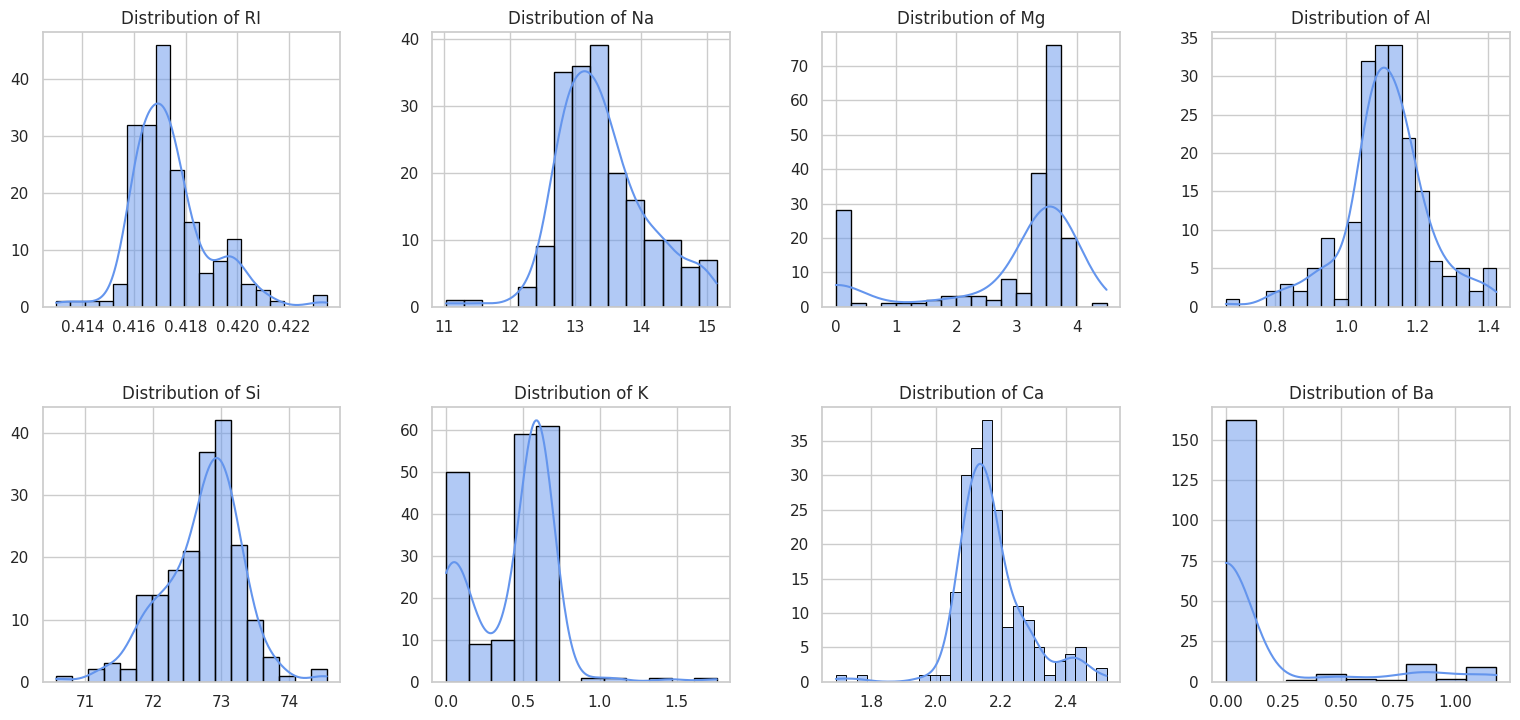

In [38]:
# Set a different style and palette for the plots
sns.set(style="whitegrid", palette="muted")

# Create the subplots with a different layout
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Plot the distribution of each column with a different color and style
for ax, column in zip(axs.flat, df_final.columns[:-1]):
    sns.histplot(data=df_final, x=column, ax=ax, kde=True, color='cornflowerblue', edgecolor='black')
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout to improve spacing
plt.tight_layout(pad=3.0)
plt.show()

# Applying standard sccalarisation

In [39]:
# Separating the independent and target variables into x and y
x = df_final.drop("Type", axis=1)
y = df_final['Type']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (193, 9)
Label Dimension = (193,)


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.308881,0.338598,1.235597,-0.693567,-1.627964,-1.326595,-0.019157,-0.416569,-0.680595
1,-0.189093,0.711257,0.554625,-0.050415,0.007672,0.166308,-1.043086,-0.416569,-0.680595
2,-0.820126,0.174628,0.516368,0.348040,0.455320,-0.153600,-1.102131,-0.416569,-0.680595
3,-0.167040,-0.302375,0.623487,-0.214872,-0.198935,0.486216,-0.595068,-0.416569,-0.680595
4,-0.272903,-0.212937,0.569928,-0.336020,0.610274,0.415125,-0.764815,-0.416569,-0.680595
...,...,...,...,...,...,...,...,...,...
188,-0.723006,1.426762,-2.199867,2.426822,0.214279,-1.539867,0.690194,2.063771,-0.680595
189,-0.798052,1.083916,-2.199867,2.626079,-0.198935,-1.255504,0.423016,2.689053,-0.680595
190,-0.524393,2.246611,-2.199867,1.223843,0.575840,-1.539867,-0.395414,3.138481,-0.680595
191,1.150430,1.411856,-2.199867,1.277311,1.195660,-1.539867,-0.351627,3.175362,-0.680595


In [41]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
2,Mg,42.084375
6,Ca,29.056433
1,Na,16.977269
4,Si,11.397541
5,K,7.345681
3,Al,6.110079
7,Ba,5.447298
0,RI,4.930595
8,Fe,1.056915


In [42]:
#droppig Ca since it has less relation with glass type
x1 = x.drop('Ca', axis=1)

vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
2,Mg,4.866654
0,RI,4.770396
4,Si,4.511179
1,Na,4.098489
3,Al,3.118087
5,K,2.627784
6,Ba,2.244434
7,Fe,1.050669


In [43]:
x = x1

In [44]:
#Applying SMOTE to oversample the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [45]:
# Assuming y1 is your target column with glass type data
type_counts = y1.value_counts()

# Print the frequencies of each glass type
print("Frequency of Each Glass Type:")
print(type_counts)

Frequency of Each Glass Type:
Type
1    153
7    153
Name: count, dtype: int64


In [46]:
X = x1
Y = y1

# Modelling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_optimal_random_state(model, X, Y, num_trials=200, test_size=0.3):
    results = []

    for random_state in range(1, num_trials):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, Y_pred)
        results.append((random_state, acc))

    best_random_state, best_acc = max(results, key=lambda x: x[1])

    return best_random_state, best_acc

# Build the model
model = RandomForestClassifier()
optimal_random_state, best_accuracy = find_optimal_random_state(model, X, Y)

print(f"Best accuracy is {round(best_accuracy, 4)} at random_state {optimal_random_state}")

Best accuracy is 1.0 at random_state 28


In [63]:
optimal_random_state

28

In [48]:
#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=28)
print("x_train shape: ", X_train.shape)
print("x_test shape:  ", X_test.shape)
print("y_train shape: ", Y_train.shape)
print("y_test shape:  ", Y_test.shape)

x_train shape:  (214, 8)
x_test shape:   (92, 8)
y_train shape:  (214,)
y_test shape:   (92,)


In [49]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [50]:
# Functions
def calc_accuracy(model, id_model, random_state=28):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)
    acc_train = model.score(X_train, Y_train)

    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(Y_test, Y_pred)}")
    print(f"Classification report: \n {classification_report(Y_test, Y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")

    return [acc, acc_train, Y_pred]

In [51]:
models = {'RandomForestClassifier' : RandomForestClassifier(),
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}

In [52]:
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving
model_metrics = pd.DataFrame([{
    'id': id_model,
    'Model': model,
    'Training Accuracy': acc_train,
    'Model Accuracy Score': acc
}])

# Append to the existing DataFrame
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)


Model: RandomForestClassifier
Confusion matrix: 
 [[42  0]
 [ 0 50]]
Classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        50

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 100.0%


In [53]:
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving result
model_metrics = pd.DataFrame([{
    'id': id_model,
    'Model': model,
    'Training Accuracy': acc_train,
    'Model Accuracy Score': acc
}])

# Append to the existing DataFrame
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[42  0]
 [ 0 50]]
Classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        50

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 100.0%


In [54]:
id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving result
model_metrics = pd.DataFrame([{
    'id': id_model,
    'Model': model,
    'Training Accuracy': acc_train,
    'Model Accuracy Score': acc
}])

# Append to the existing DataFrame
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[42  0]
 [ 2 48]]
Classification report: 
               precision    recall  f1-score   support

           1       0.95      1.00      0.98        42
           7       1.00      0.96      0.98        50

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92

Training Accuracy using LogisticRegression is 96.73%
The accuracy score using LogisticRegression is 97.83%


In [55]:
id_model = 'SVC'
model = models[id_model]

# Calculating accuracy
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving result
model_metrics = pd.DataFrame([{
    'id': id_model,
    'Model': model,
    'Training Accuracy': acc_train,
    'Model Accuracy Score': acc
}])

# Append to the existing DataFrame
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[41  1]
 [ 0 50]]
Classification report: 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        42
           7       0.98      1.00      0.99        50

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Training Accuracy using SVC is 99.07%
The accuracy score using SVC is 98.91%


In [56]:
id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving result
model_metrics = pd.DataFrame([{
    'id': id_model,
    'Model': model,
    'Training Accuracy': acc_train,
    'Model Accuracy Score': acc
}])

# Append to the existing DataFrame
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[42  0]
 [ 1 49]]
Classification report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99        42
           7       1.00      0.98      0.99        50

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Training Accuracy using GradientBoostingClassifier is 100.00%
The accuracy score using GradientBoostingClassifier is 98.91%


In [57]:
id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving result
model_metrics = pd.DataFrame([{
    'id': id_model,
    'Model': model,
    'Training Accuracy': acc_train,
    'Model Accuracy Score': acc
}])

# Append to the existing DataFrame
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[40  2]
 [ 0 50]]
Classification report: 
               precision    recall  f1-score   support

           1       1.00      0.95      0.98        42
           7       0.96      1.00      0.98        50

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92

Training Accuracy using AdaBoostClassifier is 100.00%
The accuracy score using AdaBoostClassifier is 97.83%


In [58]:
id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving result
model_metrics = pd.DataFrame([{
    'id': id_model,
    'Model': model,
    'Training Accuracy': acc_train,
    'Model Accuracy Score': acc
}])

# Append to the existing DataFrame
df_model_accuracy = pd.concat([df_model_accuracy, model_metrics], ignore_index=True)
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[40  2]
 [ 1 49]]
Classification report: 
               precision    recall  f1-score   support

           1       0.98      0.95      0.96        42
           7       0.96      0.98      0.97        50

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92

Training Accuracy using BaggingClassifier is 99.53%
The accuracy score using BaggingClassifier is 96.74%


In [59]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

,id,Model,Training Accuracy,Model Accuracy Score
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,1.000000
1,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1246002210),...",1.000000,1.000000
3,SVC,SVC(),0.990654,0.989130
4,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.000000,0.989130
2,LogisticRegression,LogisticRegression(),0.967290,0.978261
5,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",1.000000,0.978261
6,BaggingClassifier,(DecisionTreeClassifier(random_state=873193226...,0.995327,0.967391


In [60]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Function to check cross-validation scores
def checking_cvscore(id_model, model, X, Y):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    score_mean = score.mean()
    print(f"\n::: Model: {id_model} ::: \nScores: {score}")
    print(f"Score mean: {score_mean:.4f}")
    return score_mean

# Assuming 'X' and 'Y' are defined somewhere globally or passed as parameters to this script
# Assuming 'models' is a dictionary where keys are model IDs and values are model instances

df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy.set_index("id", inplace=True)

# Evaluate cross-validation for each model and save the scores
for id_model, model in models.items():
    score_mean = checking_cvscore(id_model, model, X, Y)
    current_acc = df_model_accuracy.loc[id_model, 'Model Accuracy Score']
    diff = current_acc - score_mean  # Calculate the difference

    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff

# Output the updated DataFrame
print(df_model_accuracy)



::: Model: RandomForestClassifier ::: 
Scores: [0.98387097 1.         0.98360656 0.90163934 0.96721311]
Score mean: 0.9673

::: Model: ExtraTreesClassifier ::: 
Scores: [0.96774194 1.         0.98360656 0.95081967 0.96721311]
Score mean: 0.9739

::: Model: LogisticRegression ::: 
Scores: [0.9516129  0.98360656 1.         0.90163934 0.95081967]
Score mean: 0.9575

::: Model: SVC ::: 
Scores: [0.98387097 1.         1.         0.93442623 0.95081967]
Score mean: 0.9738

::: Model: GradientBoostingClassifier ::: 
Scores: [0.98387097 0.98360656 0.98360656 0.90163934 0.96721311]
Score mean: 0.9640

::: Model: AdaBoostClassifier ::: 
Scores: [0.98387097 0.98360656 0.98360656 0.85245902 0.96721311]
Score mean: 0.9542

::: Model: BaggingClassifier ::: 
Scores: [0.96774194 0.98360656 0.98360656 0.93442623 0.96721311]
Score mean: 0.9673
                                                                        Model  \
id                                                                              


# After CV the highes accuracy is Extra tree classifier

In [64]:
#HYPERPARAMETERTUNING
random_state=optimal_random_state

In [65]:
random_state

28

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 50, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model
model = ExtraTreesClassifier()

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [28, 10, 50, 1000]})

In [67]:
# best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
best_params

Best Parameters for ExtraTreesClassifier model:


{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 28}

In [68]:
best_model

ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                     n_jobs=-2, random_state=28)

In [69]:
# FINAL MODEL
best_model = ExtraTreesClassifier (criterion = 'entropy', max_depth = 10, n_estimators = 200, n_jobs = -2, random_state =28)

best_model.fit(X_train, Y_train)
y_pred = best_model.predict(X_test)

# Check the accuracy
acc = accuracy_score(Y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 100.0%


In [79]:
# Saving the model
import joblib
joblib.dump(best_model, "Glass_identification_model.pkl")

['Glass_identification_model.pkl']

In [80]:
# load the saved model and get the predictions
model = joblib.load("Glass_identification_model.pkl")

# Prediction
prediction = model.predict(X_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(Y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(Y_test)
df_result.T

Accuracy score: 100.000 %


,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
Predicted,1,1,1,7,1,7,7,7,7,1,...,1,7,7,1,1,1,7,7,7,7
Original,1,1,1,7,1,7,7,7,7,1,...,1,7,7,1,1,1,7,7,7,7


The best model is Extra tree classifier with the accuracy of 100%